1- get the performance of FL : global model accuracy through  rounds

15     57.78
30     67.50
43     83.33
55     83.12
68     83.33
83     83.54
98     83.54
113    82.50
125    85.52
137    83.54
152    83.54
166    83.54
180    83.54
194    83.54
207    83.54
219    83.54
234    83.54
246    83.54
260    83.54
274    83.54
289    83.54
302    83.54
317    83.54
331    83.54
344    83.54
358    83.54
373    83.54
383    83.54
394    83.54
408    83.54
Name: accuracy, dtype: float64


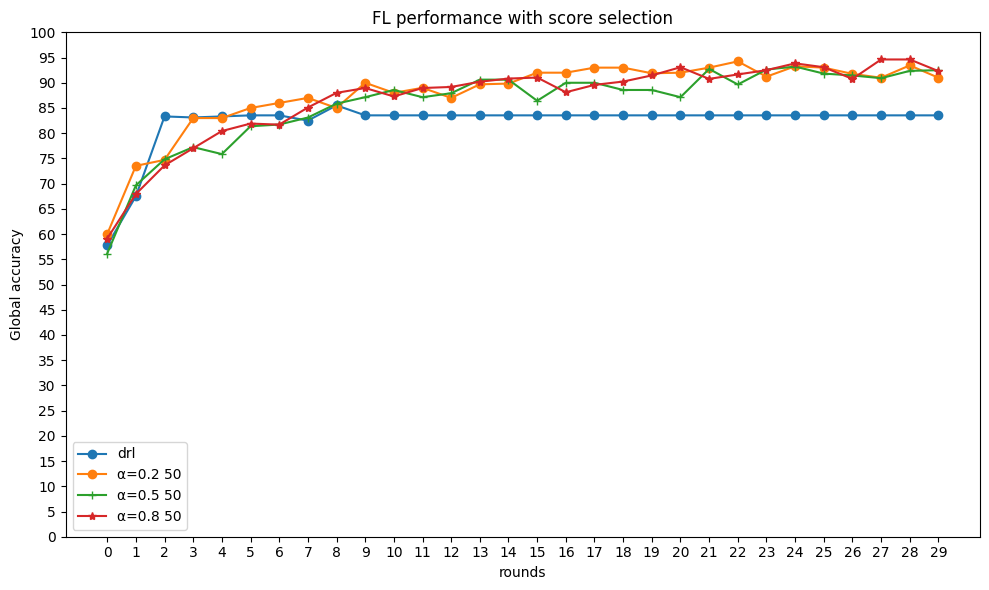

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df2 = pd.read_csv('../results/scenario1/drl/models.csv') 
df5 = pd.read_csv('../results/scenario2/score_malicious30/models.csv') 
df8 = pd.read_csv('../results/scenario2/score_malicious60//models.csv')  # Replace 'your_csv_file.csv' with your actual file name
df52 = pd.read_csv('../results/scenario1/score_alpha02_nodes50/models.csv') 
df55 = pd.read_csv('../results/scenario1/score_alpha05_nodes50/models.csv') 
df58 = pd.read_csv('../results/scenario1/score_alpha08_nodes50/models.csv')  # Replace 'your_csv_file.csv' with your actual file name


# Filter rows with type=2
filtered_df2 = df2[df2['type'] == 2]
filtered_df2 = filtered_df2[1:]

filtered_df5 = df5[df5['type'] == 2]
filtered_df5 = filtered_df5[1:]

filtered_df8 = df8[df8['type'] == 2]
filtered_df8 = filtered_df8[1:]

filtered_df52 = df52[df52['type'] == 2]
filtered_df52 = filtered_df52[1:]

filtered_df55 = df55[df55['type'] == 2]
filtered_df55 = filtered_df55[1:]

filtered_df58 = df58[df58['type'] == 2]
filtered_df58 = filtered_df58[1:]

# Extract accuracy values
accuracies2 = filtered_df2['accuracy']
# accuracies5 = filtered_df5['accuracy']
# accuracies8 = filtered_df8['accuracy']

accuracies52 = filtered_df52['accuracy']
accuracies55 = filtered_df55['accuracy']
accuracies58 = filtered_df58['accuracy']

index = filtered_df2['round']

print(accuracies2)
# print(accuracies52)

# print(accuracies5)
# print(accuracies55)

# print(accuracies8)
# print(accuracies58)
# print(accuracies)
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(index, accuracies2, marker='o', label="drl")
# plt.plot(index, accuracies5, marker='+', label="malicious=30%")
# plt.plot(index, accuracies8, marker='*', label="malicious=60%")
plt.plot(index, accuracies52, marker='o', label="α=0.2 50")
plt.plot(index, accuracies55, marker='+', label="α=0.5 50")
plt.plot(index, accuracies58, marker='*', label="α=0.8 50")
plt.title('FL performance with score selection')
plt.xlabel('rounds')
plt.ylabel('Global accuracy')
plt.yticks(range(0, 101, 5))
plt.xticks(range(0,30, 1))
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
import json
import numpy as np
with open("../results/scenario1/drl/blockchain.json",'r') as f:
    data = json.load(f)

In [6]:
# Create a dictionary to store honesty values for each nodeId
honesty_values_dict = {}

# Iterate through the transactions of all blocks
for json_obj in data:
    for transaction in json_obj['Transactions']:
        if transaction['Content']['message_type'] == 1:
            node_id = transaction['Content']['nodeId']
            honesty = transaction['Content']['honesty']

            if node_id not in honesty_values_dict:
                honesty_values_dict[node_id] = []

            honesty_values_dict[node_id].append(honesty)

# Print honesty values for each node in a single line
for node_id in range(0, 50):  # Assuming node IDs are from 1 to 100
    if node_id in honesty_values_dict:
        honesty_list = honesty_values_dict[node_id]
        if len(honesty_list)==7 :
            honesty_list.append(honesty_list[-1])
        print(f"Node {node_id}: {honesty_list}")
    else:
        print(f"Node {node_id}: No honesty values")


Node 0: [0.0, 0.0, 0.0, 1.636, 3.303, 4.928, -5.072, -15.072, -15.072, -15.072, -13.358, -18.469, -22.844, -32.844, -42.844, -48.719, -50.83, -60.83, -61.955, -71.955, -81.955, -87.83, -97.83, -107.83, -117.83, -119.997, -122.872, -121.301, -124.587, -134.587]
Node 1: [0.0, 1.444, 3.158, 4.958, 2.158, 3.991, -6.009, -16.009, -14.384, -14.384, -24.384, -22.384, -22.384, -32.384, -32.384, -42.384, -42.384, -52.384, -62.384, -64.551, -62.551, -72.551, -70.718, -80.718, -90.718, -90.718, -88.718, -89.518, -91.685, -101.685]
Node 2: [0.0, -2.0, -0.333, -4.333, -4.333, -14.333, -12.333, -10.333, -20.333, -24.583, -34.583, -32.916, -42.916, -42.916, -41.166, -51.166, -61.166, -61.166, -59.499, -63.499, -61.999, -71.999, -71.999, -76.499, -86.499, -84.999, -84.999, -84.999, -94.999, -92.999]
Node 3: [0.0, 2.0, 3.5, -6.5, -16.5, -27.5, -37.5, -47.5, -57.5, -67.5, -67.5, -65.5, -65.5, -75.5, -75.5, -85.5, -84.0, -82.0, -92.0, -102.0, -112.0, -122.0, -132.0, -130.0, -140.0, -150.0, -160.0, -170.0

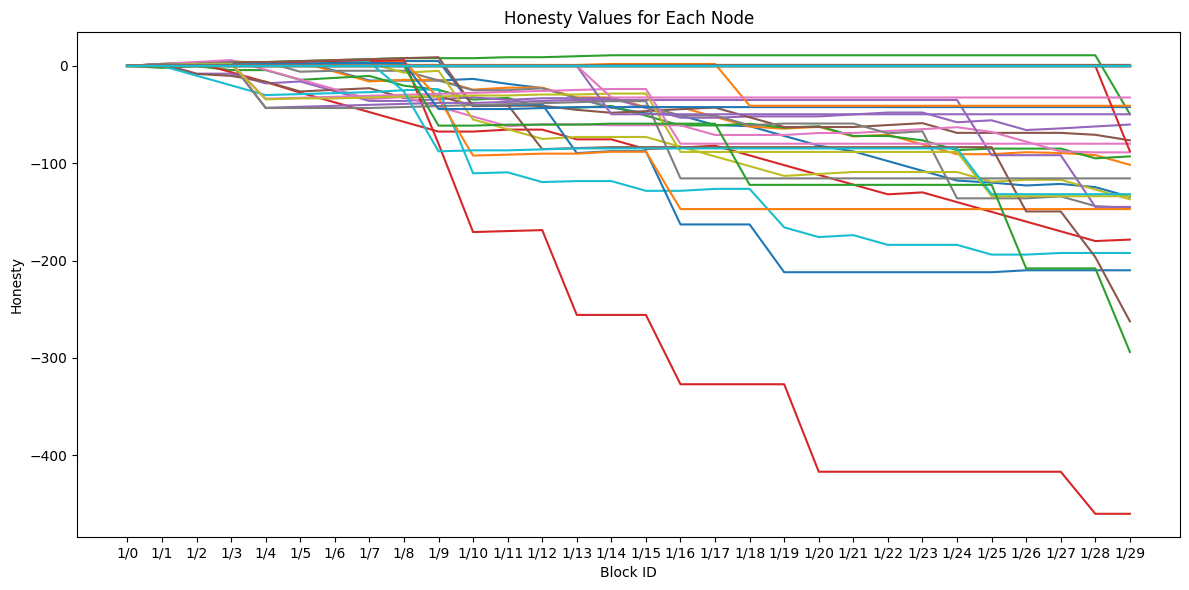

In [8]:
import matplotlib.pyplot as plt

# Specify the node IDs you want to include on the plot
# specific_node_ids = [11,17,38,37,77,95,86,97]  # Add the node IDs you want to display

# Prepare data for plotting
node_ids = sorted(honesty_values_dict.keys())

block_ids = [json_obj['BlockId'] for json_obj in data]

plt.figure(figsize=(12, 6))

# Plot honesty values for each node
for node_id in node_ids:
    honesty_values = honesty_values_dict[node_id]
    plt.plot(block_ids, honesty_values, label=f'Node {node_id}')

plt.xlabel('Block ID')
plt.ylabel('Honesty')
plt.title('Honesty Values for Each Node')
# plt.legend()
# plt.xticks(rotation=45)

# y_ticks = np.arange(-15, 11, 1)
# y_tick_labels = [f'{tick:.0f}' for tick in y_ticks]
# plt.yticks(y_ticks, y_tick_labels)
# plt.yscale('logit')
plt.tight_layout()

# Show or save the plot
plt.show()

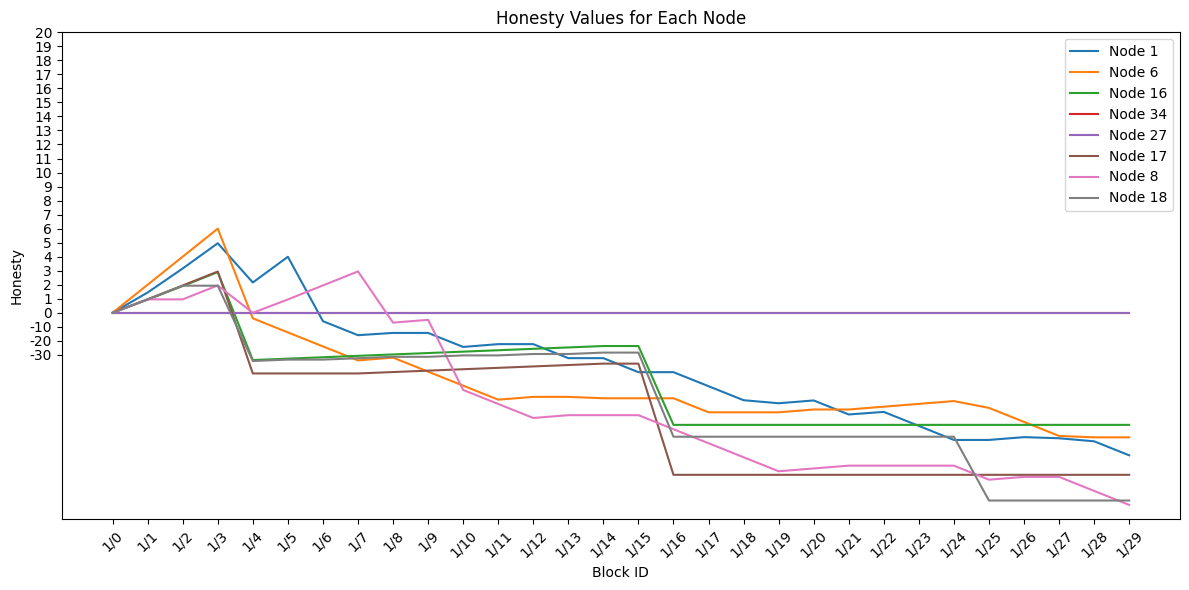

In [9]:
y = [-3, -2, -1, 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
y_ticks = [-30, -20,-10, 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]  # Custom y-axis tick values


def process_y_values(y_values):
    return [y / 10 if y < 0 else y for y in y_values]



specific_node_ids = [1,6,16,34,27,17,8,18]  

# Prepare data for plotting
# node_ids = sorted(honesty_values_dict.keys())
block_ids = [json_obj['BlockId'] for json_obj in data]

plt.figure(figsize=(12, 6))

# Plot honesty values for each node
for node_id in specific_node_ids:
    honesty_values = honesty_values_dict[node_id]
    plt.plot(block_ids, process_y_values(honesty_values), label=f'Node {node_id}')

plt.xlabel('Block ID')
plt.ylabel('Honesty')
plt.title('Honesty Values for Each Node')
plt.legend()
plt.xticks(rotation=45)
plt.yticks(y, y_ticks)
# plt.yscale('logit')
plt.tight_layout()

# Show or save the plot
plt.show()